In [129]:
# import usefull packages
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import csv

# Carregua o arquivo CSV em um objeto de grafo em NetworkX
G = nx.Graph()
with open('./data/airports.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    headers = next(reader)
    for row in reader:
        if len(row) >= 2:
            source, target = row[:2]
            attributes = {header: value for header, value in zip(headers, row)}
            G.add_node(source, **attributes)
            G.add_node(target, **attributes)
            G.add_edge(source, target)

# Salva o grafo em formato GraphML
nx.write_graphml(G, './data/airports.graphml')
# G = nx.read_graphml('./data/air_traffic.graphml')

print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 2037 nodes and 1083 edges


In [130]:
# Just look how the nodes are represented in the Network
G.nodes(data=True)

NodeDataView({'KDFW': {'code': 'KDFW', 'name': 'DALLAS & FORT WORTH, TEXAS', 'state': '', 'region': '', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'continent': 'AMÉRICA DO NORTE', 'Código OACI': '', 'lat_geo_point': '32.896801', 'lon_geo_point': '-97.038002'}, 'DALLAS & FORT WORTH, TEXAS': {'code': 'KDFW', 'name': 'DALLAS & FORT WORTH, TEXAS', 'state': '', 'region': '', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'continent': 'AMÉRICA DO NORTE', 'Código OACI': '', 'lat_geo_point': '32.896801', 'lon_geo_point': '-97.038002'}, 'KJFK': {'code': 'KJFK', 'name': 'NEW YORK, NEW YORK', 'state': '', 'region': '', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'continent': 'AMÉRICA DO NORTE', 'Código OACI': '', 'lat_geo_point': '40.639801', 'lon_geo_point': '-73.7789'}, 'NEW YORK, NEW YORK': {'code': 'KJFK', 'name': 'NEW YORK, NEW YORK', 'state': '', 'region': '', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'continent': 'AMÉRICA DO NORTE', 'Código OACI': '', 'lat_geo_point': '40.639801', 'lon_geo_point': '-73.77

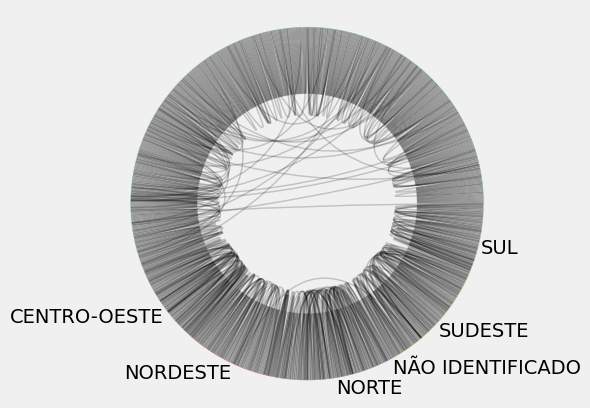

In [131]:
import matplotlib.pyplot as plt
from nxviz import annotate, highlights

ax = nv.circos(G, 
               group_by="region",
               node_color_by="region",
               #edge_alpha_by="edge_value"
)
annotate.circos_group(G, group_by="region")

# # Randomly select an edge from the graph G
# u, v = choice(list(G.edges()))

# highlights.circos_edge(G, u, v, group_by="nutrient")
# highlights.circos_node(G, u, group_by="nutrient")
# highlights.circos_node(G, v, group_by="nutrient", color="blue")

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

In [68]:
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

In [70]:
nx.degree_assortativity_coefficient(G)

-0.08291466036045296

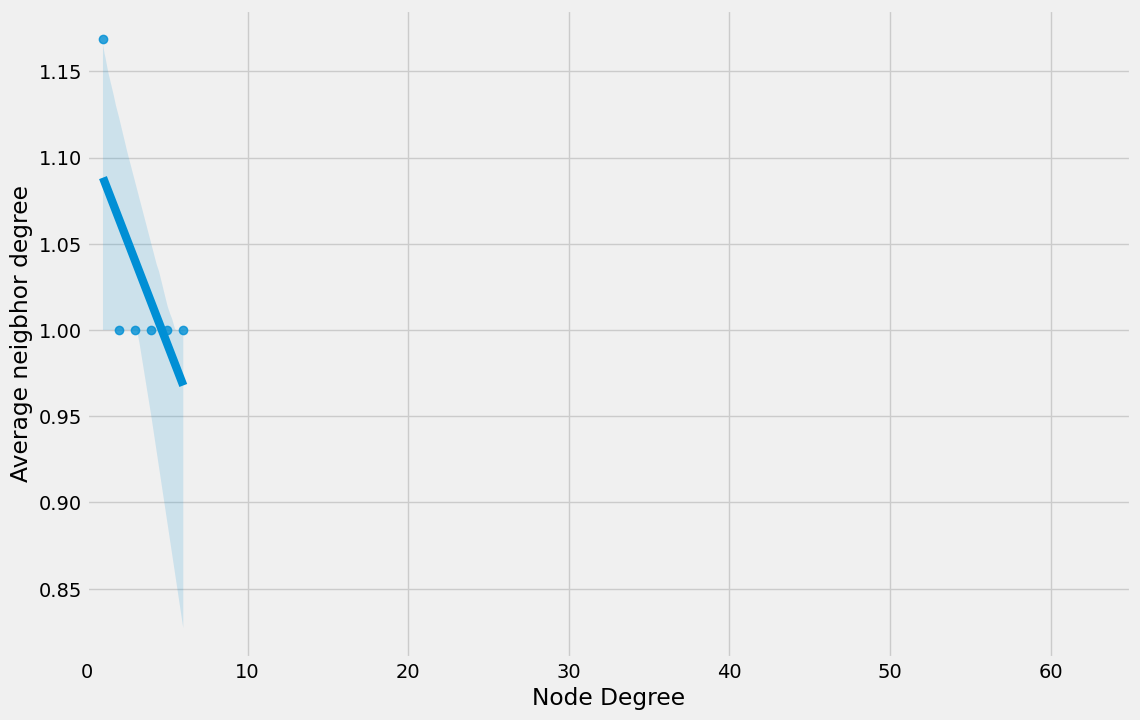

In [69]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(x=degree,y=avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

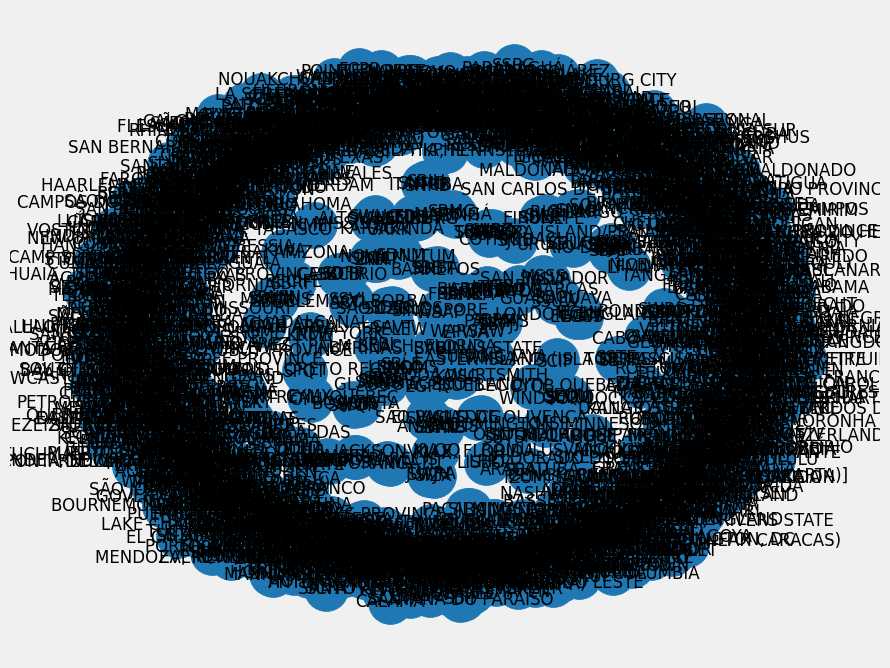

In [101]:
# connected componentes

# Salva o grafo em formato GraphML
# G = nx.read_graphml('./data/air_traffic.graphml')

# # create a branch of edges
# G.add_edges_from([("a","e"),
#                   ("e","d"),("e","f"),
#                   ("d","f"),
#                   ("f","h"),("f","g"),
#                   ("h","i"),("h","b")])

# # add a disconnected node
# G.add_node("c")

# draw the graph
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G, ax=ax,node_size=1000)
plt.axis("off")
plt.show()

In [72]:
# G is connected or not?
nx.is_connected(G)

False

In [73]:
# interact under all connected component of G
for component in nx.connected_components(G):
  print(component)

{'f', 'd', 'i', 'b', 'h', 'a', 'g', 'e'}
{'c'}


In [74]:
# how many connected components has G?
nx.number_connected_components(G)

2

In [75]:
# which connected component is a node N?
nx.node_connected_component(G,"a")

{'a', 'b', 'd', 'e', 'f', 'g', 'h', 'i'}